
# Espectogramas para Análise de Sinais de Áudio

### - Exemplo de Espectograma

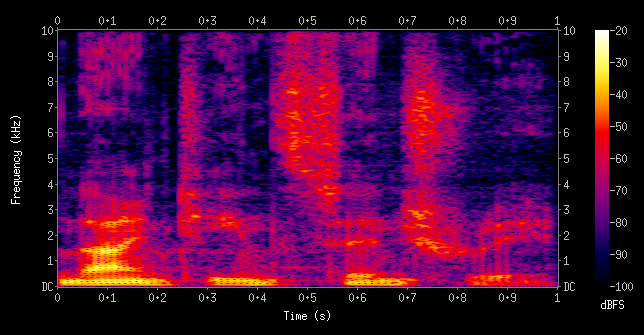

In [59]:
from IPython.display import Image

Image(r"Exemplo_Spectograma.png")
# fonte da imagem: https://upload.wikimedia.org/wikipedia/commons/c/c5/Spectrogram-19thC.png

Usando o link abaixo, você terá acesso a uma maneira intuitiva sobre como os espectogramas funcionam <br>
https://musiclab.chromeexperiments.com/Spectrogram/

### -Fundamentação Matemática

https://youtube.com/playlist?list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC <br>
Não conseguiria falar desse assuntos sem citar uma fonte interessante sobre a fundamentação matemática <br>
e a forma como esses códigos são passados.

De forma resumida nós vamos falar sobre 2 termos mais matematicamente complicados: 
- Transformada de Gabor
- Transformada de Fourrier 

## Transformada de Fourrier

Na transformada de Fourrier, nós temos uma decomposição de um sinal que pode estar escrito <br>
no domínio do tempo para um que esteja esccrito no domínio da frequência, dessa forma, <br>
cabe mostrar a fórmula matemática usada para tal.

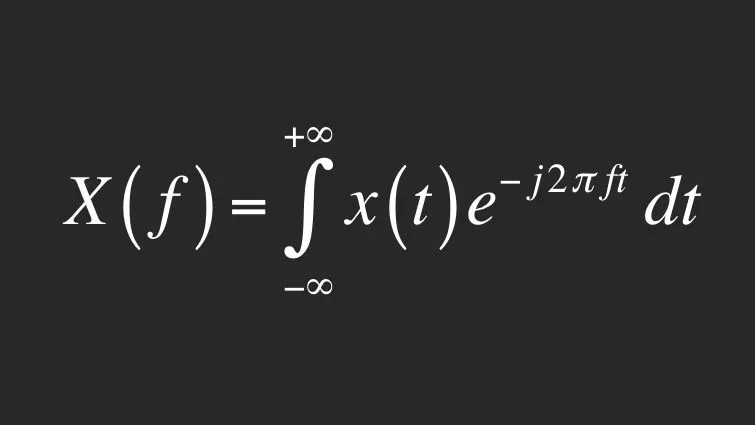

In [60]:
Image(r"Transformada_de_Fourrier.png")
# fonte da imagem: https://gizmodo.uol.com.br/transformada-fourier-usos/


Então a transformada de Fourrier acima significa uma transformada de sinais do espectro do tempo <br>
para o da frequência, para isso ela fará a decomposição do sinal em funções seno e cosseno para se <br>
aproximar cada vez mais dos sinais escolhidos. <br>
Quando falamos de um áudio, estamos falando de uma onda, e o que a transformada de Fourrier faz, seria <br>
uma superposição ondas até chegar na onda que seja compatível com a onda desejada, lembrando que esse <br>
compatível está mais relacionado com um resultado com o qual você esteja satisfeito, através de uma <br>
margem de erro, do que de um resultado preciso.

In [61]:
"ainda tenho que fazer uns gráficos mostrando como devem ser plotadas as trasnformadas de Fourrier"

'ainda tenho que fazer uns gráficos mostrando como devem ser plotadas as trasnformadas de Fourrier'

## Transformada de Gabor

A transformada de Gabor, nada mais é do que um caso especial da Transformada de Fourrier em Tempo Curto (FFT), <br>
a qual é baseada em uma Transformada Discreta de Fourrier e sua inversa. 

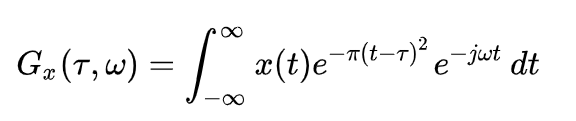

In [62]:
Image(r"Transformada_de_Gabor.png")


Antes de tranformarmos a função, faremos primeiramente a multiplicação dela por uma Gausiana, <br>
visualmente isso implica que a função mais perto do sinal analisado terá maior peso. <br>
A Gausiana é uma função comum no âmbito da estatística como distribuição normal.

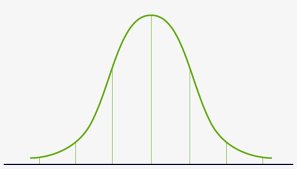

In [63]:
Image(r"Exemplo_Gausiana.png")

Para quem tiver mais interesse no assunto, cabe leituras sobre Wavelets e suas aplicações.

## Usos da Transformadas

O uso que teremos agora, será de uma MEL FILTER BANK, a forma como ela é obtida lembra um pouco as Wavelets, <br>
todavia, a maior diferença dessa está no fato dela perceber frequências de forma muito parecido como os humanos, <br>
ou seja, há mais resolução para frequências mais baixas. 
https://www.electrical4u.com/filter-bank/

Iremos utilizar uma biblioteca chamada LIBROSA, aqui está o link para a documentação dela: <br>
https://librosa.org/doc/latest/tutorial.html

### Baixando as Bibliotecas

In [64]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


### Carregando o Documento com Áudio

In [65]:
scale_file = r"D:\OCEAN\Personal Stuff\Dataset\cats_dogs_sound\cat_1.wav"
#Esse é o caminho até o local do documento no meu computador

In [76]:
scale, sr = librosa.load(scale_file)
ipd.Audio(scale, rate=sr)

### Carregando o MEL FILTER

In [67]:
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)

In [68]:
filter_banks.shape

(10, 1025)

## Plotando a Figura

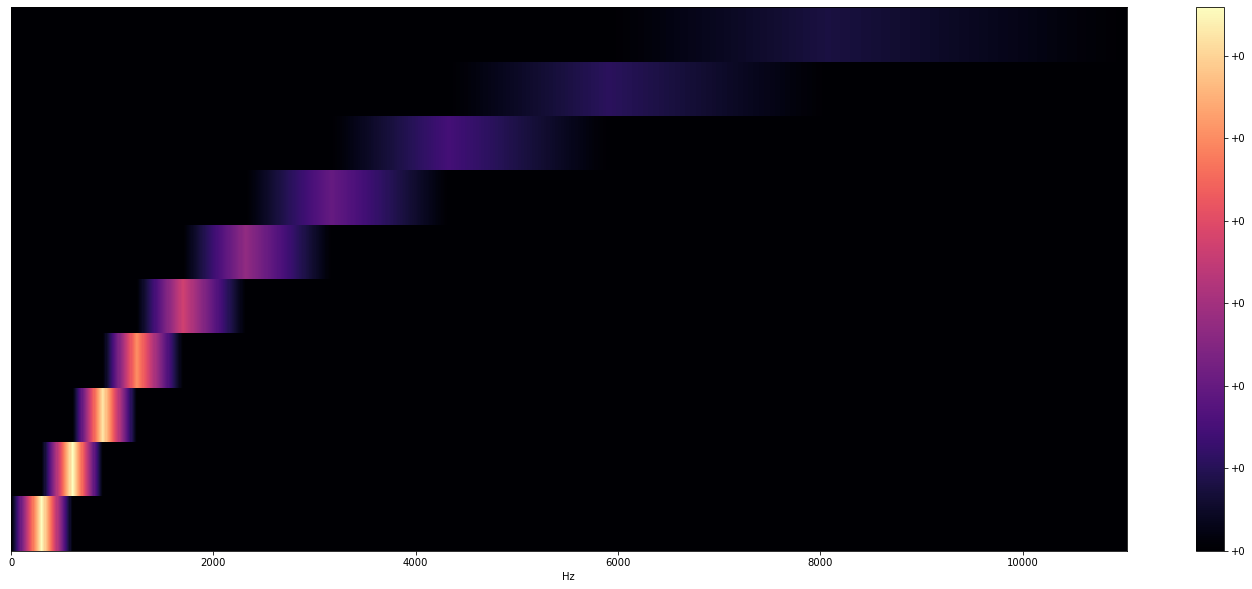

In [75]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks, 
                         sr=sr, 
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

In [70]:
mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sr, n_fft=2048, hop_length=512, n_mels=10)

C:\Users\Marcus_Eduardo\AppData\Local\Temp\ipykernel_5640\2281820779.py:1: FutureWarning: Pass y=[ 0.00381674  0.00407222  0.00156718 ... -0.0146927  -0.01779636
 -0.01206966] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sr, n_fft=2048, hop_length=512, n_mels=10)


In [71]:
mel_spectrogram.shape

(10, 483)

In [72]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

In [73]:
log_mel_spectrogram.shape

(10, 483)

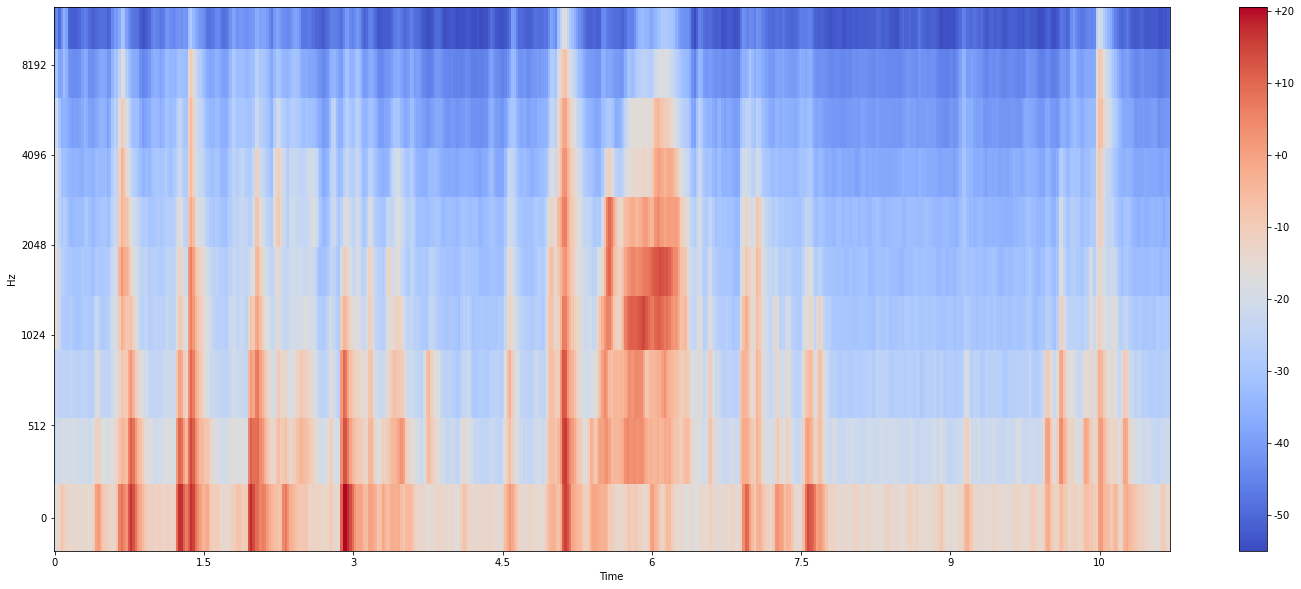

In [74]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
plt.colorbar(format="%+2.f") # essa parada aqui representa a coluna de cores

plt.savefig("saved.png")    
plt.show() #sempre vem depois do savefig()
